In [2]:
!pip install pandas scikit-learn matplotlib seaborn folium


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, precision_score, recall_score, classification_report
import folium


In [7]:
# Replace with your actual dataset
df = pd.read_csv("traffic_data_large.csv")

df.head()


,hour,day_of_week,weather_condition,road_type,air_quality,congestion_level
0,17,0,Cloudy,Main Road,155,2
1,1,2,Clear,Highway,190,0
2,17,6,Rainy,Street,176,0
3,14,2,Foggy,Main Road,123,0
4,11,2,Clear,Main Road,90,0


In [8]:
# Check the total number of rows
print("Total rows:", len(df))

# View the first 10 rows
df.head(10)


Total rows: 1000


,hour,day_of_week,weather_condition,road_type,air_quality,congestion_level
0,17,0,Cloudy,Main Road,155,2
1,1,2,Clear,Highway,190,0
2,17,6,Rainy,Street,176,0
3,14,2,Foggy,Main Road,123,0
4,11,2,Clear,Main Road,90,0
5,16,5,Cloudy,Street,118,0
6,4,6,Clear,Main Road,163,2
7,17,6,Foggy,Street,184,2
8,21,6,Foggy,Highway,129,2
9,7,1,Clear,Main Road,83,0


In [9]:
pd.set_option('display.max_rows', None)
df


,hour,day_of_week,weather_condition,road_type,air_quality,congestion_level
0,17,0,Cloudy,Main Road,155,2
1,1,2,Clear,Highway,190,0
2,17,6,Rainy,Street,176,0
3,14,2,Foggy,Main Road,123,0
4,11,2,Clear,Main Road,90,0
5,16,5,Cloudy,Street,118,0
6,4,6,Clear,Main Road,163,2
7,17,6,Foggy,Street,184,2
8,21,6,Foggy,Highway,129,2
9,7,1,Clear,Main Road,83,0


In [26]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour               1000 non-null   int64  
 1   day_of_week        1000 non-null   int64  
 2   weather_condition  1000 non-null   int64  
 3   road_type          1000 non-null   int64  
 4   air_quality        1000 non-null   int64  
 5   congestion_level   1000 non-null   int64  
 6   latitude           1000 non-null   float64
 7   longitude          1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   hour               1000 non-null   int64 
 1   day_of_week        1000 non-null   int64 
 2   weather_condition  1000 non-null   object
 3   road_type          1000 non-null   object
 4   air_quality        1000 non-null   int64 
 5   congestion_level   1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [12]:
df.describe()


,hour,day_of_week,air_quality,congestion_level
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,11.730000,2.985000,125.951000,0.979000
std,6.852449,1.994179,44.119668,0.846922
min,0.000000,0.000000,50.000000,0.000000
25%,6.000000,1.000000,87.000000,0.000000
50%,12.000000,3.000000,127.000000,1.000000
75%,18.000000,5.000000,164.000000,2.000000
max,23.000000,6.000000,200.000000,2.000000


In [15]:
from sklearn.preprocessing import LabelEncoder

le_weather = LabelEncoder()
le_road = LabelEncoder()

df['weather_condition'] = le_weather.fit_transform(df['weather_condition'])
df['road_type'] = le_road.fit_transform(df['road_type'])


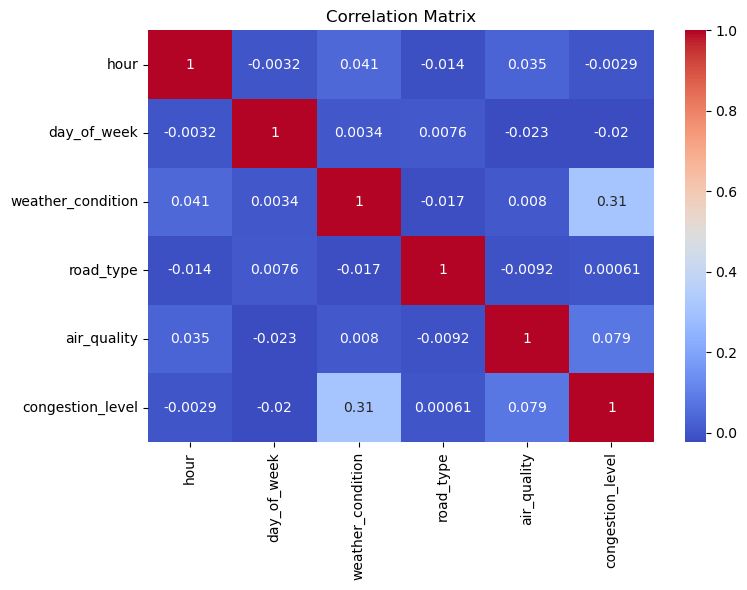

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [22]:
# Example: Let's assume these columns exist
features = ['hour', 'day_of_week', 'weather_condition', 'road_type', 'air_quality']
target = 'congestion_level'  # e.g., 0 (low), 1 (moderate), 2 (high)

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [20]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("MSE:", mse)
print("RMSE:", rmse)
print("Precision:", precision)
print("Recall:", recall)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


MSE: 1.125
RMSE: 1.0606601717798212
Precision: 0.5158321025108777
Recall: 0.505

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.63      0.53        68
           1       0.44      0.35      0.39        52
           2       0.62      0.50      0.55        80

    accuracy                           0.51       200
   macro avg       0.50      0.49      0.49       200
weighted avg       0.52      0.51      0.50       200



In [23]:
# Create a map centered at a location
m = folium.Map(location=[30.7333, 76.7794], zoom_start=13)  # Chandigarh coords

# Example routes with congestion
routes = [
    {"start": [30.7333, 76.7794], "end": [30.7545, 76.8037], "congestion": 2},
    {"start": [30.7333, 76.7794], "end": [30.7280, 76.7845], "congestion": 0},
    {"start": [30.7333, 76.7794], "end": [30.7456, 76.7912], "congestion": 1},
]

colors = {0: "green", 1: "orange", 2: "red"}

for r in routes:
    folium.PolyLine(
        locations=[r["start"], r["end"]],
        color=colors[r["congestion"]],
        weight=6,
        tooltip=f"Congestion: {r['congestion']}"
    ).add_to(m)

m


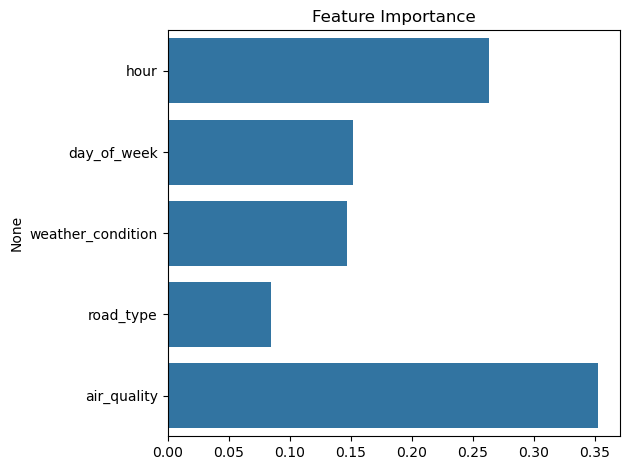

In [24]:
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


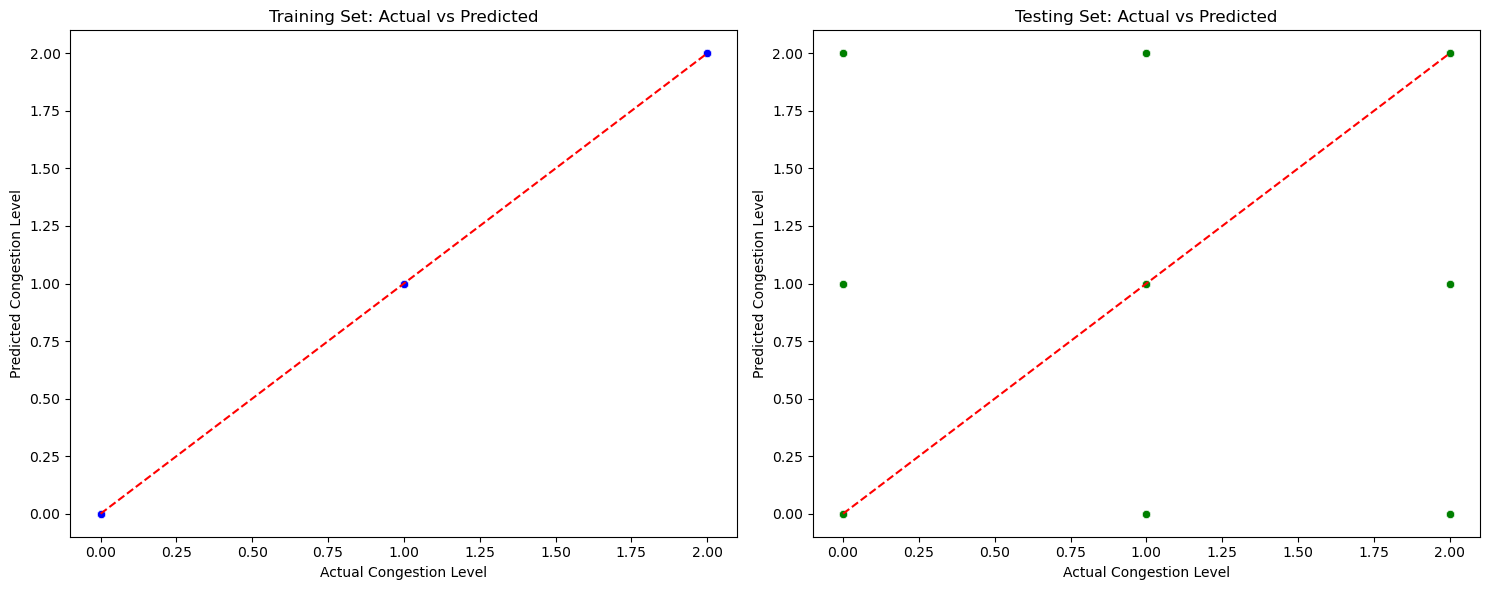

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, precision_score, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming you've already loaded and preprocessed your data
df = pd.read_csv("traffic_data_large.csv")

# Encode categorical features
le_weather = LabelEncoder()
le_road = LabelEncoder()

df['weather_condition'] = le_weather.fit_transform(df['weather_condition'])
df['road_type'] = le_road.fit_transform(df['road_type'])

# Select features and target
features = ['hour', 'day_of_week', 'weather_condition', 'road_type', 'air_quality']
target = 'congestion_level'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on both training and testing datasets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Create subplots for training and testing
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Training set plot
sns.scatterplot(x=y_train, y=y_train_pred, ax=ax[0], color='blue')
ax[0].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
ax[0].set_title('Training Set: Actual vs Predicted')
ax[0].set_xlabel('Actual Congestion Level')
ax[0].set_ylabel('Predicted Congestion Level')

# Testing set plot
sns.scatterplot(x=y_test, y=y_test_pred, ax=ax[1], color='green')
ax[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
ax[1].set_title('Testing Set: Actual vs Predicted')
ax[1].set_xlabel('Actual Congestion Level')
ax[1].set_ylabel('Predicted Congestion Level')

plt.tight_layout()
plt.show()


In [25]:
# 1. (Optional) Simulate lat/lon if you don't have real ones:
import numpy as np
lat_center, lon_center = 30.7333, 76.7794   # e.g. Chandigarh
df['latitude']  = lat_center + np.random.uniform(-0.02, +0.02, size=len(df))
df['longitude'] = lon_center + np.random.uniform(-0.02, +0.02, size=len(df))

# 2. Choose a color map for your congestion levels:
colors = {0: 'green', 1: 'orange', 2: 'red'}

# 3. Build the folium map with a MarkerCluster for performance:
import folium
from folium.plugins import MarkerCluster

m = folium.Map(location=[lat_center, lon_center], zoom_start=13)
marker_cluster = MarkerCluster().add_to(m)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        color=colors[row['congestion_level']],
        fill=True,
        fill_color=colors[row['congestion_level']],
        fill_opacity=0.7,
        popup=f"Congestion: {row['congestion_level']}"
    ).add_to(marker_cluster)

# 4. Display

